In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import curvedsky as cs
import binning

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from lbxs4.cmb import CMBLensed
from lbxs4.simulations import LBSky,S4Sky
from lbxs4.filtering import Filtering,FiltCoadd
from lbxs4.multitracer import CoaddKappa
from lbxs4.delensing import Delenser
from lbxs4.utils import *
from lbxs4.config import *

In [16]:
s4SIM = S4Sky()

In [19]:
mask = hp.ud_grade(s4SIM.nilc_mask,512)

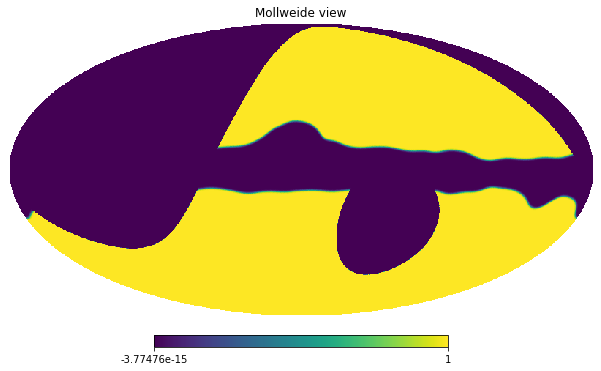

In [20]:
hp.mollview(mask)

In [9]:
s4emap_fname ='/global/cfs/cdirs/cmbs4xlb/v1/component_separated/chwide/nilc_Emaps/fits/NILC_CMB-S4_CHWIDE-Emap_NSIDE2048_fwhm2.1_CHLAT-only_medium_cos-NSIDE2048-lmax4096_mc000.fits'
lbemap_fname ='/global/cfs/cdirs/cmbs4xlb/v1/component_separated/cs_products_LB/medium/nilc_standB2_b0b5/E_0000_reso30acm.fits'

In [10]:
s4emap = hp.read_map(s4emap_fname)
lbemap = hp.read_map(lbemap_fname)

In [11]:
s4elm = hp.map2alm(s4emap, lmax=1024)
lbelm = hp.map2alm(lbemap, lmax=1024)

In [25]:
s4TQU = hp.alm2map([s4elm*0,s4elm,s4elm*0],512,lmax=1024)
lbTQU = hp.alm2map([lbelm*0,lbelm,lbelm*0],512,lmax=1024)*mask

In [26]:
ro_s4TQU = change_coord(s4TQU, coord=['C','G'])*mask

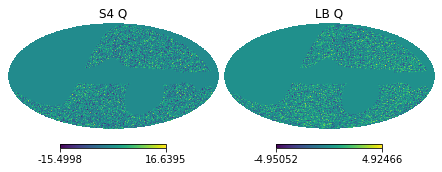

In [30]:
hp.mollview(ro_s4TQU[1],title='S4 Q',sub=(1,2,1))
hp.mollview(lbTQU[1],title='LB Q',sub=(1,2,2))

In [28]:
s4ELM = hp.map2alm(ro_s4TQU, lmax=1024)[1]
lbELM = hp.map2alm(lbTQU, lmax=1024)[1]

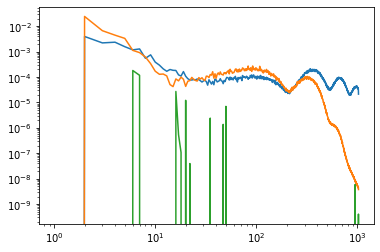

In [29]:
plt.loglog(hp.alm2cl(s4ELM))
plt.loglog(hp.alm2cl(lbELM))
plt.loglog(hp.alm2cl(s4ELM,lbELM))